<a href="https://colab.research.google.com/github/jamunozlab/introductory_mechanics_spring_2023/blob/main/projects/Phys_2320_project_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 7

Monte Carlo methods are computational algorithms that compute quantities by repeating the same 'measurement' many times, but at different 'places,' then  aggregating all the measurements. The places where the measurements occur are determined randomly based on a probability distribution. These methods are perfect for numerical integration, particularly when the integral is a difficult one. You can read more about them [here](https://en.wikipedia.org/wiki/Monte_Carlo_method).
<hr>

A classic application of Monte Carlo is to determine the value of $\pi$. The surface area of a circle is $A_{\rm c} = \pi r^2$, where $r$ is the radius of the circle. The area of a square of side length $\ell = 2r$ is $A_{\rm s} = \ell^2 = 4r^2$. The ratio of the circle and square surface areas is then:

.

$\frac{A_{\rm c}}{A_{\rm s}} = \frac{\pi r^2}{4r^2} = \frac{\pi}{4}$.

.

Hence, $4 \times \frac{A_{\rm c}}{A_{\rm s}} = \pi$.

.

To compute $\pi$, we just need the ratio of the surface area of a circle of radius $r$ to that of the surface area of a square of side $2r$. We can do that using Monte Carlo!
<hr>

In [1]:
# Make our lives easy
import numpy as np
import pandas as pd

In [2]:
# Numpy comes with pre-programmed distributions, such as uniform, Gaussian, etc.
# Use the uniform distribution to produce *size* numbers between -r and r
sample_size = 1000
r = 1.0
x_random = np.random.uniform(low=-r, high=r, size=sample_size)
y_random = np.random.uniform(low=-r, high=r, size=sample_size)

In [3]:
# Put this random numbers in a pandas DataFrame for easy manipulation
df_square_dict = {}
df_square_dict['x'] = x_random
df_square_dict['y'] = y_random
df_square = pd.DataFrame(df_square_dict)

<Axes: xlabel='x', ylabel='y'>

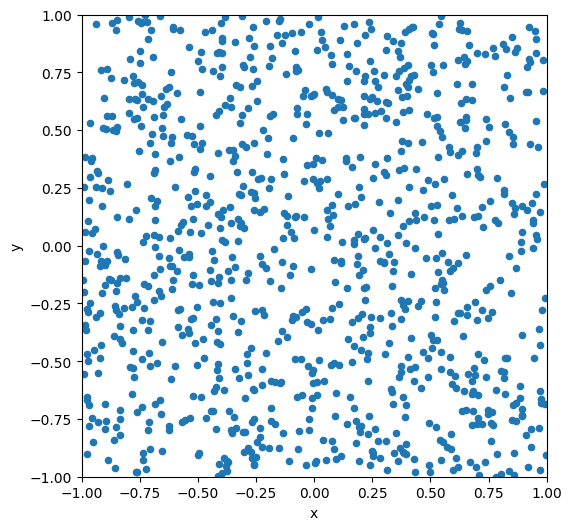

In [4]:
# These are the 'places' where you will perform your 'measurements'
df_square.plot(kind='scatter', x='x', y='y', figsize=(6,6), xlim=(-1,1), ylim=(-1,1))

In [5]:
# Using Pythagoras,
# determine which measurements lie within the circle of radius r
# and put them in a list
in_circle_list = []
for i in range(len(df_square)):
  a = df_square['x'].iloc[i]
  b = df_square['y'].iloc[i]
  c = np.sqrt(a**2 + b**2)
  if c <= r:
    in_circle_list.append(1) # 1 if inside the circle
  else:
    in_circle_list.append(0) # 0 if outside

In [6]:
# Add the list as another column 
df_square['in_circle'] = pd.Series(in_circle_list)

In [7]:
# Use this column to create a new DataFrame that contains circle points only
df_circle = df_square[df_square['in_circle'] == r]

<Axes: xlabel='x', ylabel='y'>

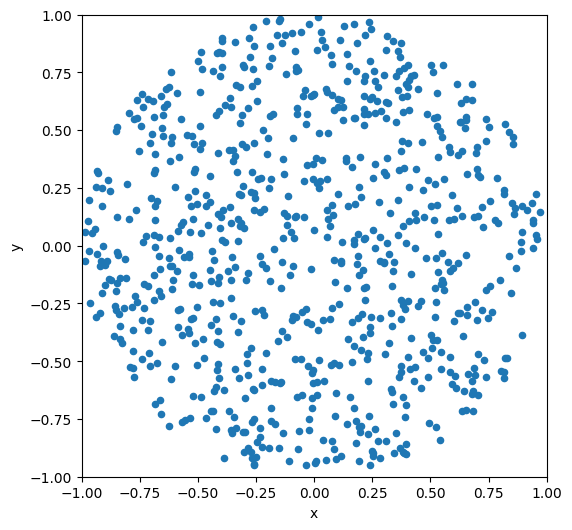

In [8]:
# These are the places that you measred to be inside the circle 
df_circle.plot(kind='scatter', x='x', y='y', figsize=(6,6), xlim=(-r,r), ylim=(-r,r))

In [9]:
number_points_in_square = len(df_square)
number_points_in_circle = len(df_circle)
ratio = number_points_in_circle / number_points_in_square
print('pi is approximately ', 4*ratio)

pi is approximately  3.168


## Action items

1. Increase the number of measurements by increasing the value of the variable sample_size from 100 to 1000, 10000, 100000, and 1000000. Enter below the estimate of pi for each value


In [10]:
## YOUR ANSWER TO QUESTION 1 GOES HERE
# sample_size , pi 
# 100
# 1000
# 10000
# 100000
# 1000000


The center of mass along the x- and y-directions are given by the following equations:

.

$x_{\rm CM} = \frac{\sum_i^n m_i x_i}{\sum_i^n m_i}$, 

.

$y_{\rm CM} = \frac{\sum_i^n m_i y_i}{\sum_i^n m_i}$, 

.

We can use Monte Carlo to estimate them! Let's start with the circle along the x-direction.




In [11]:
m = 1/sample_size # Assume mass is constant
nominator = 0 # We will update these with our measurements 
denominator = 0 
direction = 'x'
# direction = 'y'
df = df_circle
#df = df_square

# this 'for' loop will iterate over all the samples, summing each time
# but only for the x-direction
for row in range(len(df.index)):
  nominator = nominator +  m * df[direction].iloc[row] 

print('nominator:', nominator)

# this 'for' loop will iterate over all the samples, summing each time
# but only for the x-direction
for row in range(len(df.index)):
  denominator = denominator +  m 

print('denominator:', denominator)

nominator: -0.02269735812374115
denominator: 0.7920000000000006


In [12]:
center_mass = nominator/denominator
print('Center of mass along ', direction, 'direction is at: ', center_mass)

Center of mass along  x direction is at:  -0.028658280459269107


## Action items

2. Increase the number of measurements by increasing the value of the variable sample_size from 100 to 1000, 10000. Enter below the estimate of the center of mass of a circle along the $x$- and $y$-directions for each value of sample size. 

3. Increase the number of measurements by increasing the value of the variable sample_size from 100 to 1000, 10000. Enter below the estimate of the center of mass of a square along the $x$- and $y$-directions for each value of sample size. 


In [13]:
## YOUR ANSWER TO QUESTION 2 GOES HERE
# Center of mass of the circle
# sample_size , x, y 
# 100
# 1000
# 10000

In [14]:
## YOUR ANSWER TO QUESTION 3 GOES HERE
# Center of mass of the square
# sample_size , x, y 
# 100
# 1000
# 10000

The moment of inertia about the axis of rotation is given by the following equation:

.

$I = \sum_i m_i d_i^2 \;$ , 

.

where $d_i$ is the 'parallel' distance of particle $i$ to the axis of rotation. We can use Monte Carlo to estimate the moment of inertia! Let's start with an axis of rotation that runs through the origin. 




In [15]:
m = 1/sample_size # Assume mass is constant
moment_of_inertia = 0 # We will update these with our measurements 
total_mass = 0 
#df = df_circle
df = df_square

# this 'for' loop will iterate over all the samples, summing each time
for row in range(len(df.index)):
  a = df['x'].iloc[row]
  b = df['y'].iloc[row]
  d = np.sqrt(a**2 + b**2)
  moment_of_inertia = moment_of_inertia + m * d**2

# this 'for' loop will iterate over all the samples, summing each time
for row in range(len(df.index)):
  total_mass = total_mass +  m 


In [16]:
print('Moment of inertia about the origin: ', moment_of_inertia, 'kg m^2')
print('Total mass: ', total_mass, 'kg')

Moment of inertia about the origin:  0.6633296144709242 kg m^2
Total mass:  1.0000000000000007 kg


## Action items

4. Increase the number of measurements by increasing the value of the variable sample_size from 100 to 1000, then 10000. Enter below the estimate of the moment of inertia of a circle (or disk) for each value of sample size. 

5. Increase the number of measurements by increasing the value of the variable sample_size from 100 to 1000, then 10000. Enter below the estimate of the moment of inertia of a square for each value of sample size. 

6. The analytical moment of inertia of a disk of constant mass density and radius $r$ is $I_{\rm c} = \frac{1}{2}Mr^2$, where $M$ is the total mass. How does it compare with your best Monte Carlo estimate? 

7. The analytical moment of inertia of a square of constant mass density and side $\ell=2r$ is $I_{\rm s} = \frac{1}{6}M\ell^2 =  \frac{2}{3}Mr^2$, where $M$ is the total mass. How does it compare with your best Monte Carlo estimate? 

In [17]:
## YOUR ANSWER TO QUESTION 4 GOES HERE
# sample_size , moment of inertia of the disk 
# 100
# 1000
# 10000

In [18]:
## YOUR ANSWER TO QUESTION 5 GOES HERE
# sample_size , moment of inertia of the square
# 100
# 1000
# 10000

In [19]:
## YOUR ANSWER TO QUESTION 6 GOES HERE
#

In [20]:
## YOUR ANSWER TO QUESTION 7 GOES HERE
#